In [1]:
import warnings
warnings.filterwarnings('ignore'

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
%matplotlib inline

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease,Unnamed: 14
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2,NaN
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1,NaN
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2,NaN
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1,NaN
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   270 non-null    int64  
 1   sex                   270 non-null    int64  
 2   pain type             270 non-null    int64  
 3   BP                    270 non-null    int64  
 4   cholestrol            270 non-null    int64  
 5   fbs                   270 non-null    int64  
 6   resting ecg           270 non-null    int64  
 7   max heart rate        270 non-null    int64  
 8   exercise angina       270 non-null    int64  
 9   ST depression         270 non-null    float64
 10  ST slope              270 non-null    int64  
 11  flouroscopy coloured  270 non-null    int64  
 12  thal                  270 non-null    int64  
 13  heart disease         270 non-null    int64  
 14  Unnamed: 14           0 non-null      float64
dtypes: float64(2), int64(13

In [5]:
df.describe()

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease,Unnamed: 14
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000,0.0
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444,NaN
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827,NaN
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000,NaN
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000,NaN
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000,NaN
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000,NaN
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000,NaN


In [6]:
df.drop(columns=['Unnamed: 14'], inplace=True)
df.head()

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [7]:
df.shape

(270, 14)

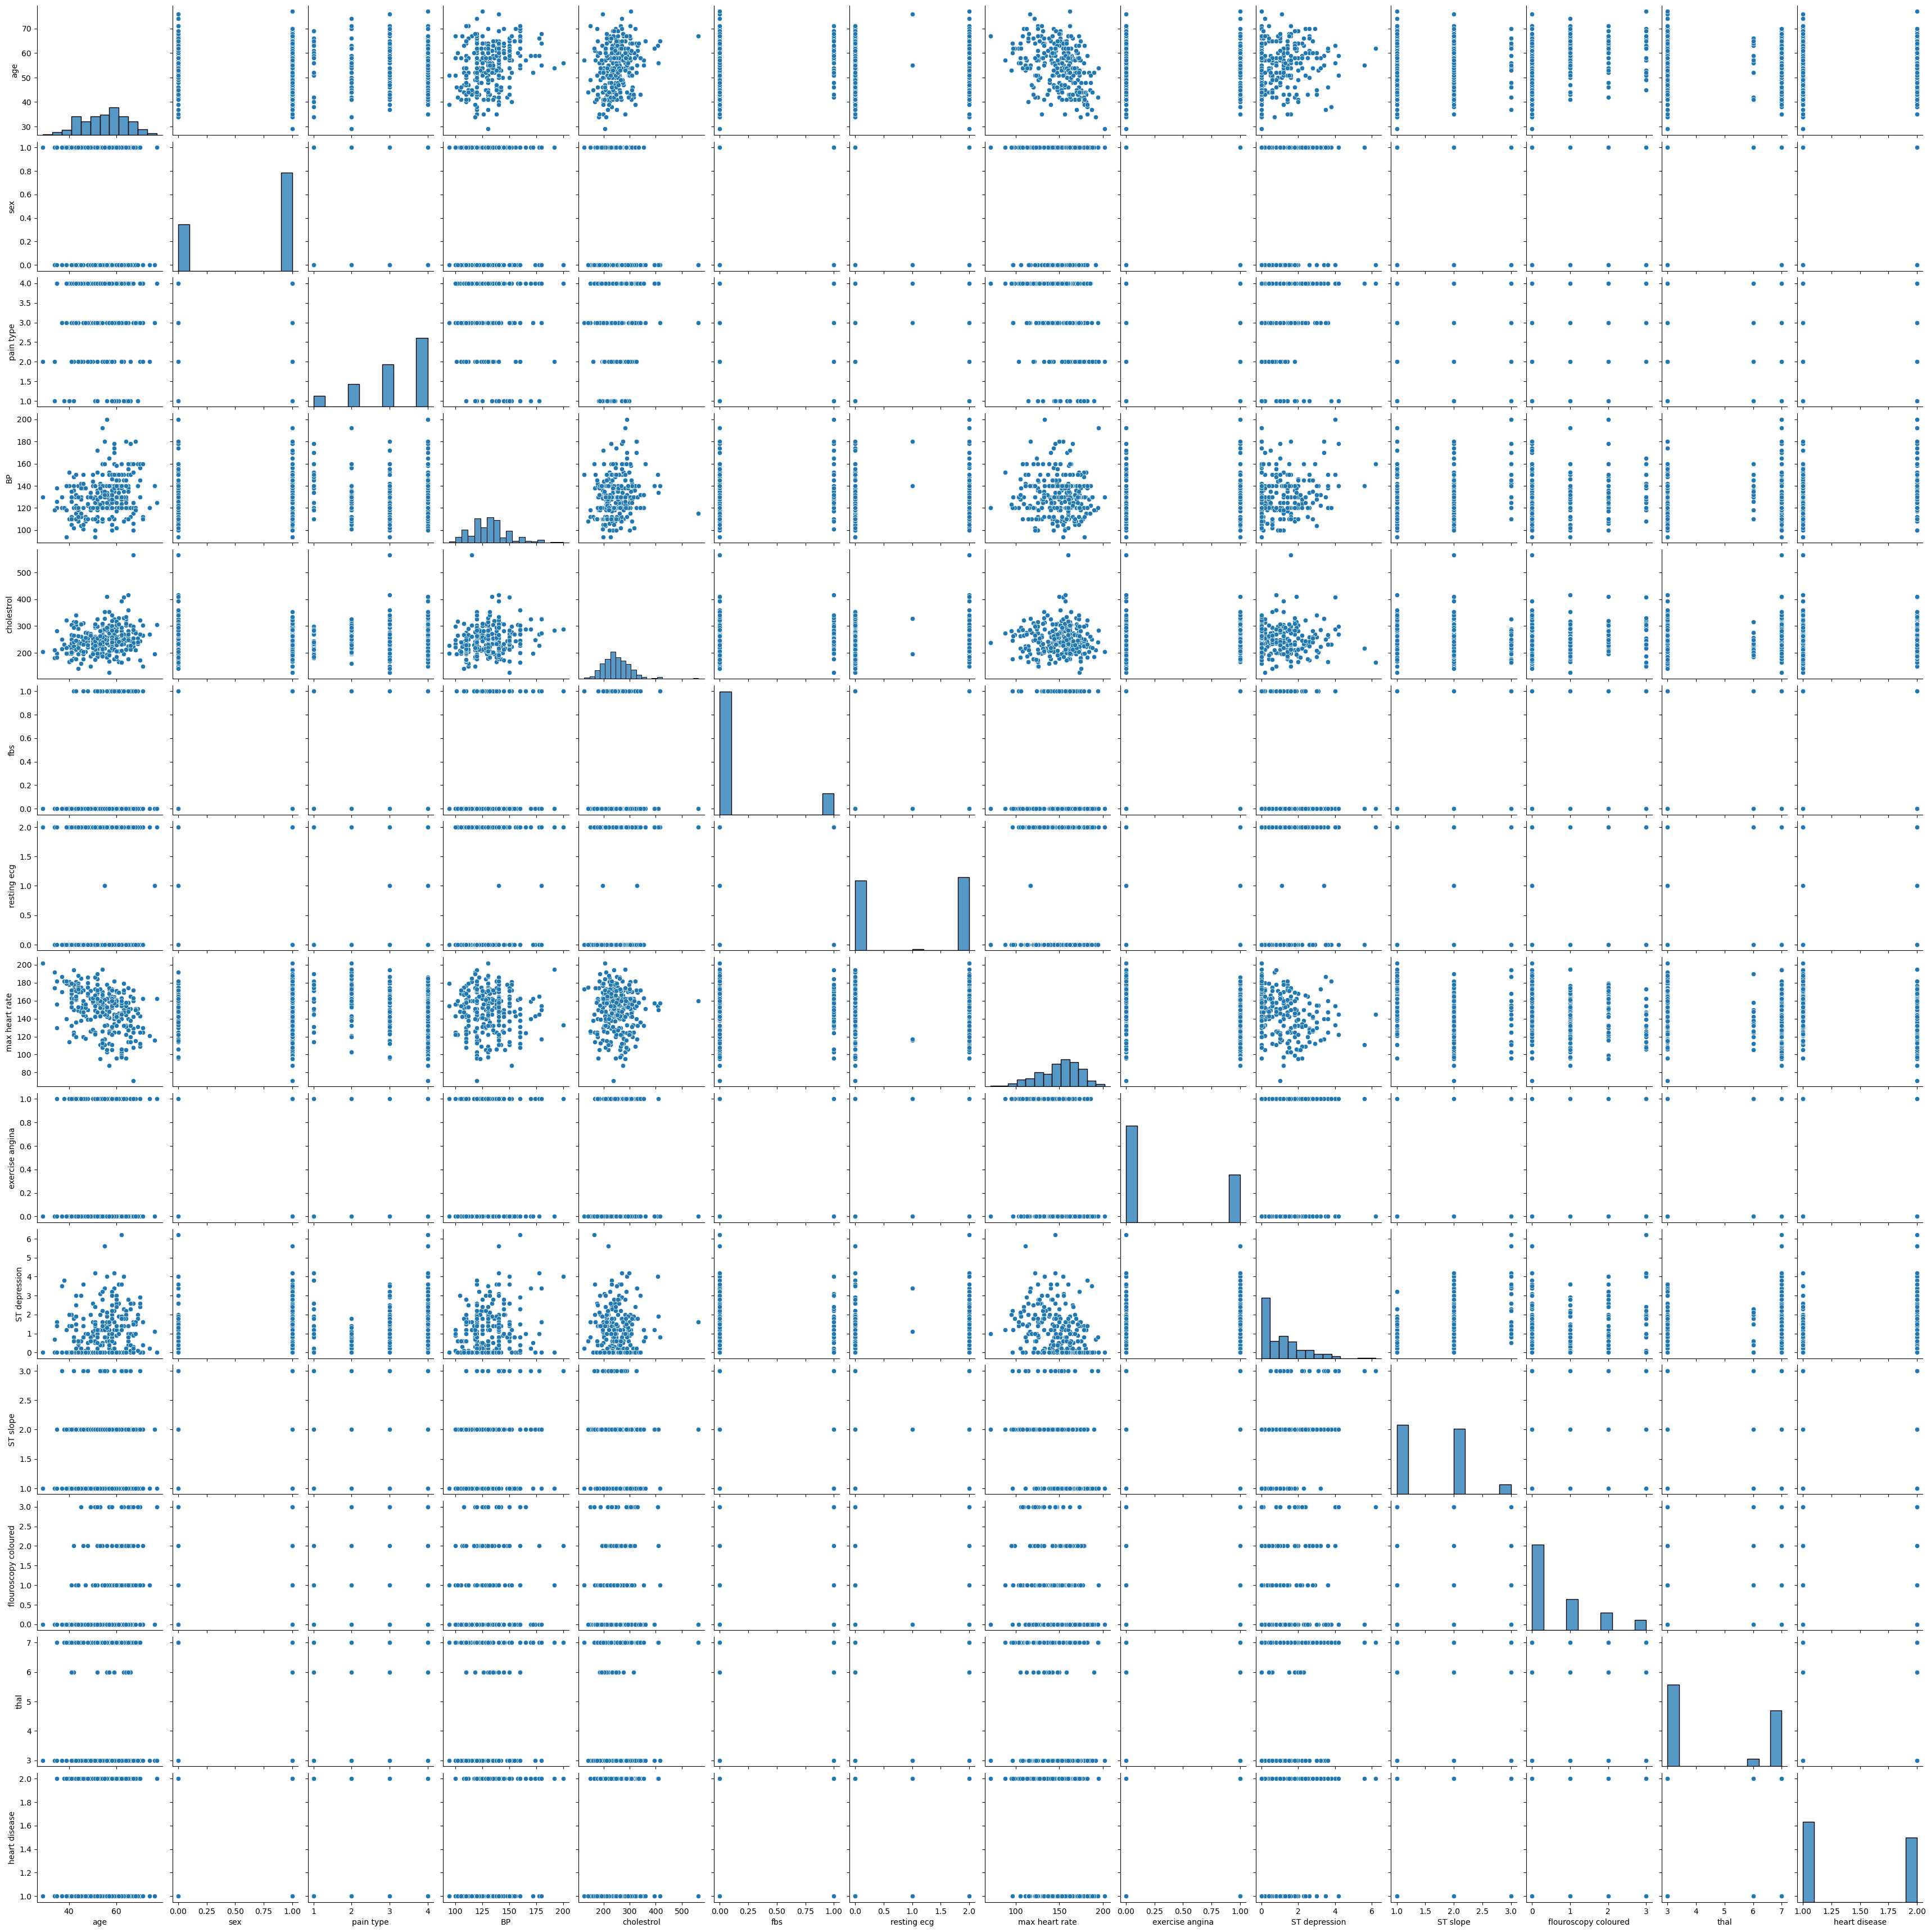

In [8]:
sns.pairplot(df)

In [9]:
res = df['BP'].median()

In [10]:
df.loc[df['BP'] > 140, "BP"] = res

In [11]:
df.describe()

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,125.511111,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,10.353863,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,130.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,140.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [12]:
res = df['cholestrol'].median()
df.loc[df['cholestrol'] > 245, "cholestrol"] = res

In [13]:
df.describe()

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,125.511111,227.922222,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,10.353863,24.297824,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,130.000000,245.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,140.000000,245.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [14]:
res = df['max heart rate'].median()
df.loc[df['max heart rate'] > 166, "max heart rate"] = res
df.describe()

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,125.511111,227.922222,0.148148,1.022222,143.961111,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,10.353863,24.297824,0.355906,0.997891,17.716619,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.250000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,130.000000,245.000000,0.000000,2.000000,153.875000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,140.000000,245.000000,1.000000,2.000000,166.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


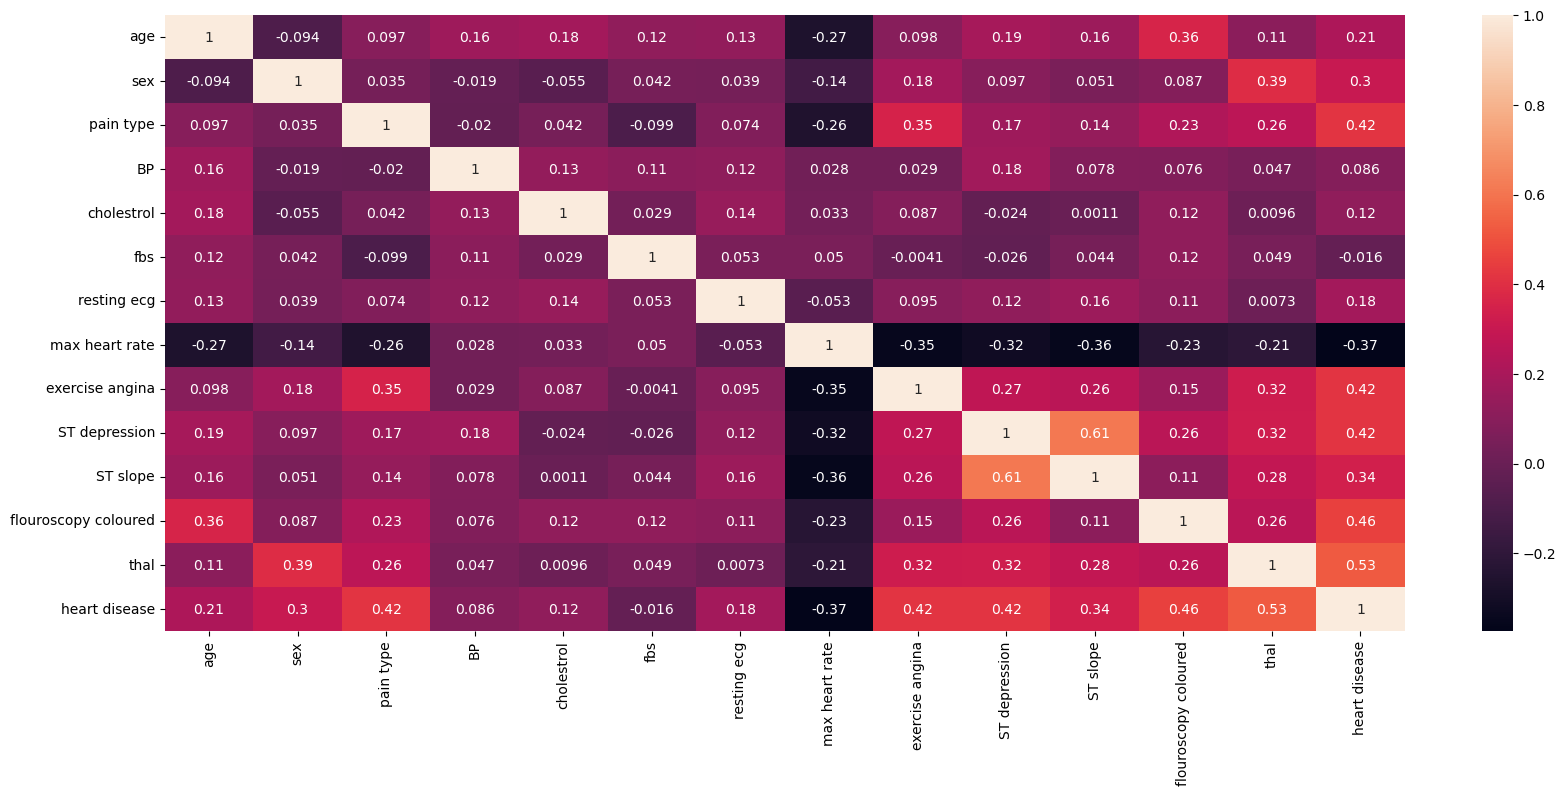

In [15]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [17]:
y = df.pop('heart disease')
x = df

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .30)

In [19]:
len(x_test)

81

In [21]:
from sklearn.tree import DecisionTreeClassifier
df_default = DecisionTreeClassifier()

In [22]:
df_default.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
yhat = df_default.predict(x_test)

In [24]:
yhat

array([1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1], dtype=int64)

In [26]:
print(x_test)

     age  sex  pain type   BP  cholestrol  fbs  resting ecg  max heart rate  \
12    44    1          3  140         235    0            2           153.5   
101   67    1          4  120         237    0            0            71.0   
47    44    1          4  110         197    0            2           153.5   
245   60    1          4  130         245    0            0           144.0   
135   46    0          3  130         177    0            2           160.0   
..   ...  ...        ...  ...         ...  ...          ...             ...   
166   50    0          4  110         245    0            2           159.0   
31    66    1          4  130         228    0            2           138.0   
99    50    0          2  120         244    0            0           162.0   
96    66    1          4  120         245    0            2           151.0   
246   65    1          4  110         245    0            2           158.0   

     exercise angina  ST depression  ST slope  flou

In [27]:
df_default.score(x_test, y_test)

0.6296296296296297

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(yhat,y_test)

In [30]:
from sklearn import tree

[Text(0.4344262295081967, 0.9583333333333334, 'thal <= 4.5\ngini = 0.497\nsamples = 189\nvalue = [102, 87]'),
 Text(0.22950819672131148, 0.875, 'max heart rate <= 119.5\ngini = 0.343\nsamples = 100\nvalue = [78, 22]'),
 Text(0.16393442622950818, 0.7916666666666666, 'pain type <= 3.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.13114754098360656, 0.7083333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.19672131147540983, 0.7083333333333334, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.29508196721311475, 0.7916666666666666, 'ST depression <= 3.55\ngini = 0.263\nsamples = 90\nvalue = [76, 14]'),
 Text(0.26229508196721313, 0.7083333333333334, 'flouroscopy coloured <= 2.5\ngini = 0.221\nsamples = 87\nvalue = [76, 11]'),
 Text(0.22950819672131148, 0.625, 'age <= 57.5\ngini = 0.189\nsamples = 85\nvalue = [76, 9]'),
 Text(0.09836065573770492, 0.5416666666666666, 'BP <= 109.0\ngini = 0.035\nsamples = 56\nvalue = [55, 1]'),
 Text(0.06557377049180328, 0.458333333333

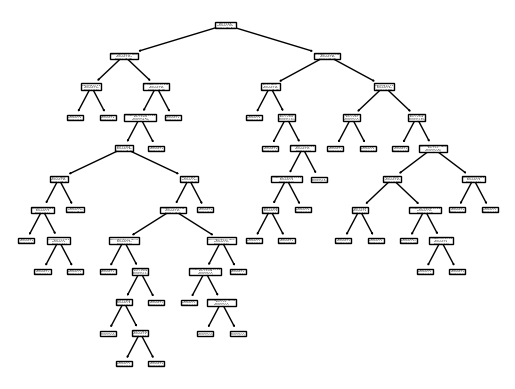

In [33]:
tree.plot_tree(df_default,feature_names=x_train.columns)

In [38]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Create the parameter grid 
param_grid = { 
'max_depth': range(5, 15, 5), 
'min_samples_leaf': range(50, 150, 50), 
'min_samples_split': range(50, 150, 50), 
'criterion': ["entropy", "gini"] 
} 
n_folds = 5 
# Instantiate the grid search model 
dtree = DecisionTreeClassifier() 
grid_search = GridSearchCV(estimator = dtree, param_grid =param_grid, 
cv = n_folds, verbose = 1) 
# Fit the grid search to the data 
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [79]:
!pip install graphviz

In [82]:
!pip install graphviz pydotplus


     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/278.7 kB 330.3 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/278.7 kB 330.3 kB/s eta 0:00:01
     ----- ------------------------------- 41.0/278.7 kB 179.6 kB/s eta 0:00:02
     ------------ ------------------------ 92.2/278.7 kB 479.1 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/278.7 kB 479.1 kB/s eta 0:00:01
     --------------------- -------------- 163.8/278.7 kB 492.3 kB/s eta 0:00:01
     ---------------------- ------------- 174.1/278.7 kB 525.1 kB/s eta 0:00:01
     -----------------------------------  276.5/278.7 kB 682.7 kB/s eta 0:00:01
     ------------------------------------ 278.7/278.7 kB 661.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: 

In [78]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from six import StringIO

In [84]:
import pydotplus

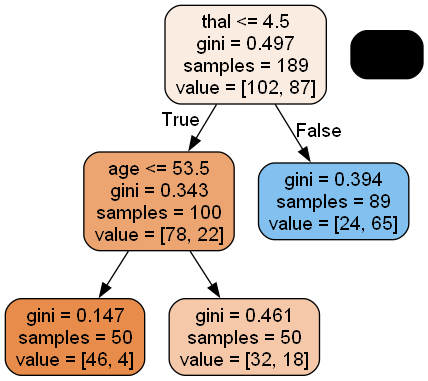

In [88]:
import os

os.environ["PATH"] +=os.pathsep+r"C:\Program Files\Graphviz\bin"
# model with optimal hyperparameters 
clf_gini = DecisionTreeClassifier(criterion = "gini", 
random_state = 100, 
max_depth=10, 
min_samples_leaf=50, 
min_samples_split=50) 
clf_gini.fit(x_train, y_train) 
# accuracy score 
clf_gini.score(x_test,y_test) 
# plotting the tree 
dot_data = StringIO() 
export_graphviz(clf_gini, 
out_file=dot_data,feature_names=x_train.columns,filled=True,rounded=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [90]:
# If you're on windows:

# Specifing path for dot file.

import os

os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz'





# plotting tree with max_depth=3

dot_data = StringIO()  

export_graphviz(df_default, out_file=dot_data,feature_names=x_train.columns, filled=True,rounded=True)



graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_pdf("df_heartdisease.pdf")

True